In [72]:
#https://raw.githubusercontent.com/datasciencedojo/datasets/refs/heads/master/titanic.csv

In [73]:
import pandas as pd
import numpy as np

# =========================
# 1. 샘플 데이터 생성 (실습용)
# =========================
data = {
    'store': ['A', 'A', 'A', 'B', 'B', 'B', 'C', 'C', 'C', 'D', 'D', 'D'],
    'menu': ['Coffee', 'Tea', 'Juice', 'Coffee', 'Tea', 'Juice', 'Coffee', 'Tea', 'Juice', 'Coffee', 'Tea', 'Juice'],
    'price': ['3,000원', '2,500원', '3,500원', '3,200원', '2,700원', '3,600원', '3,100원', '2,600원', '3,400원', '3,300원', '2,800원', '3,700원'],
    'qty': [10, 15, 5, 12, np.nan, 8, 5, 7, 3, 20, 25, 15],
    'date': ['2026-01-01', '2026-01-01', '2026-01-01', '2026-01-02', '2026-01-02', '2026-01-02', 
             '2026-01-03', '2026-01-03', '2026-01-03', '2026-01-04', '2026-01-04', '2026-01-04']
}

df = pd.DataFrame(data)

# =========================
# 2. 기본 전처리
# =========================

# ① 데이터 타입 동질화 (Type Casting)
df['price'] = df['price'].str.replace('원','', regex=False).str.replace(',','', regex=False)
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# ② 날짜 데이터 표준화
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d', errors='coerce')

# ③ 결측치 처리
df['qty'] = df['qty'].fillna(0)

# ④ 파생변수 생성 (매출)
df['sales'] = df['price'] * df['qty']

# =========================
# 3. 중간 점검
# =========================
print("=== 데이터 정보 ===")
print(df.info())
print("\n=== 데이터 샘플 ===")
print(df.head())

# =========================
# 4. 방어적 복사
# =========================
df_clean = df.copy()


=== 데이터 정보 ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   store   12 non-null     object        
 1   menu    12 non-null     object        
 2   price   12 non-null     int64         
 3   qty     12 non-null     float64       
 4   date    12 non-null     datetime64[ns]
 5   sales   12 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 708.0+ bytes
None

=== 데이터 샘플 ===
  store    menu  price   qty       date    sales
0     A  Coffee   3000  10.0 2026-01-01  30000.0
1     A     Tea   2500  15.0 2026-01-01  37500.0
2     A   Juice   3500   5.0 2026-01-01  17500.0
3     B  Coffee   3200  12.0 2026-01-02  38400.0
4     B     Tea   2700   0.0 2026-01-02      0.0


# [실습 대비] 데이터 전처리 필수 공정 및 시각화 가이드

### ① 데이터 타입 동질화 (Type Casting)
* **선택 이유**: 산술 연산 및 시각화 라이브러리(Matplotlib, Seaborn)의 안정적 구동을 위함. 특히 'Object' 타입은 연산에서 제외되므로 수치형 변환이 필수적임.

### ② 날짜 데이터 표준화 (Datetime Normalization)
* 목적: '원'이나 ',' 같은 문자가 섞인 컬럼을 연산 가능한 숫자로 변환.
* 로직: 문자열 처리 후 숫자형으로 강제 변환(pd.to_numeric).

### ③ 결측치(NaN) 진단 및 처치
* 목적: 계산 오류를 방지하고 시각화의 정확도 향상.
* 로직: isna().sum()으로 위치 파악 후, 비즈니스 로직에 따라 0 또는 평균값으로 대체.

In [74]:
# 결측치 확인 및 0으로 채우기
df['qty'] = df['qty'].fillna(0)
df['price'] = df['price'].fillna(0)

# 매출액(sales) 파생변수 생성
df['sales'] = df['price'] * df['qty']

##2. 시각화 공식: 상황별 최적의 그래프
* 파이썬 시각화는 plt.figure()(도화지 펴기) → sns.그래프명()(그림 그리기) → plt.show()(완성본 보기)의 3단계 흐름

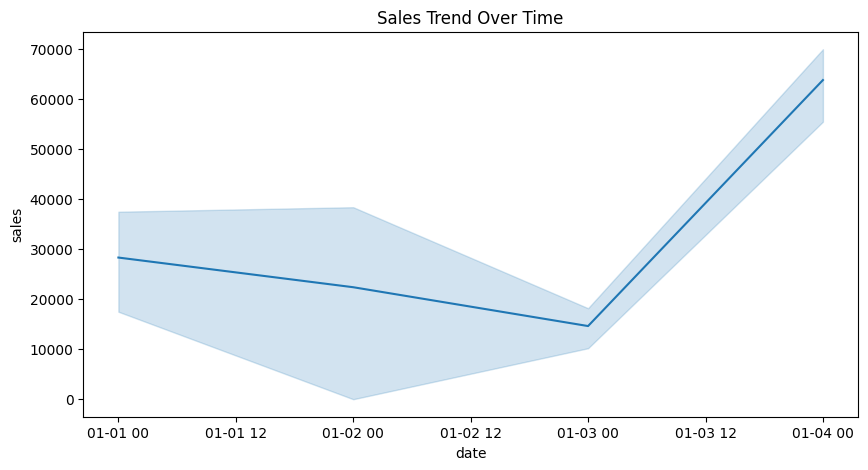

In [75]:
### ① 추세 파악: Line Plot
"시간에 따른 매출 변화는?"

plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='date', y='sales')
plt.title("Sales Trend Over Time")
plt.show()

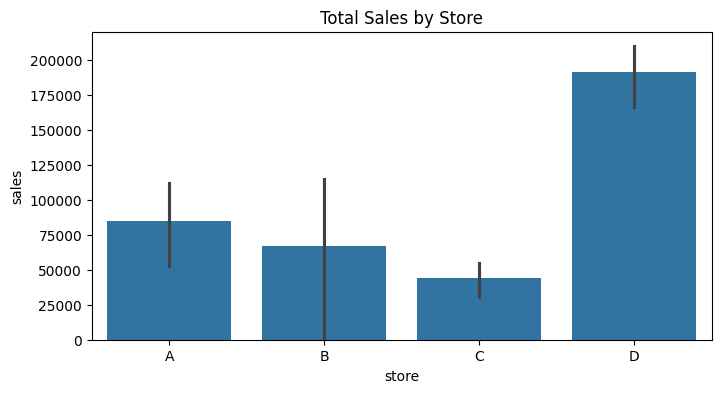

In [76]:
### ② 항목 비교: Bar Plot
"매장별/메뉴별 매출 합계를 비교할 때"
 
plt.figure(figsize=(8, 4))
# estimator=sum: 합계로 계산 (기본값은 평균)
sns.barplot(data=df, x='store', y='sales', estimator=sum)
plt.title("Total Sales by Store")
plt.show()

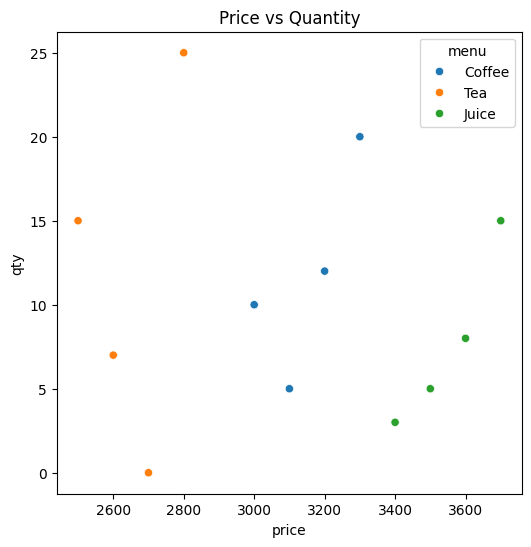

In [77]:
### ③ 상관 분석: Scatter Plot
"가격이 판매량에 영향을 주는지(상관관계) 볼 때"

plt.figure(figsize=(6, 6))
# hue: 카테고리별로 색상을 다르게 표시
sns.scatterplot(data=df, x='price', y='qty', hue='menu')
plt.title("Price vs Quantity")
plt.show()

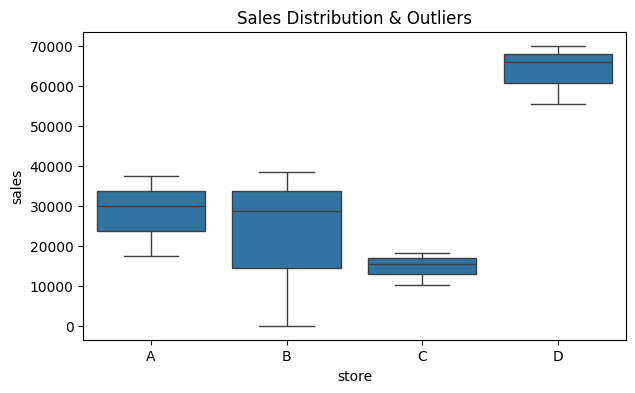

In [78]:
### ④ 분포 확인: Box Plot
"데이터의 중앙값과 튀는 값(이상치)을 찾을 때"

plt.figure(figsize=(7, 4))
sns.boxplot(data=df, x='store', y='sales')
plt.title("Sales Distribution & Outliers")
plt.show()

1) Box (상자)
* 상자의 아래 끝 = Q1 (1사분위수, 25%)
* 상자의 위 끝 = Q3 (3사분위수, 75%)
* 상자 안의 가로선 = Median(중앙값, 50%)

2) Whisker (수염)
* 상자에서 위아래로 뻗은 선
* 일반적으로 Q1 - 1.5*IQR ~ Q3 + 1.5*IQR 범위까지
* IQR = Q3 - Q1 (사분위 범위)
* 이 범위를 벗어난 값은 이상치(outlier) 로 표시

3) Outliers (이상치)
* Whisker 밖에 있는 점

### Box Plot 보는 방법

1) 중앙값 확인
* Box 안의 가로선 → 데이터의 대표값

2) 분포 범위 확인
* Box 높이(IQR) → 데이터의 집중 정도
* Whisker 길이 → 전체 데이터 범위

3) 왜도 확인
* Median이 Box 중앙보다 위/아래로 치우친 경우 → 데이터가 한쪽으로 치우침

4) 이상치 확인
* Whisker 밖 점 → 다른 값과 동떨어진 극단치

### ⑤ 데이터 분포: Histogram (추가됨!)
"매출액이 주로 어떤 금액대에 몰려 있는가?"
* 연속형 데이터의 분포를 막대 형태로 보여주는 그래프
* 빈도(frequency) 또는 **밀도(density)**를 나타냄

* 연속형 데이터 분포를 직관적으로 이해 가능
* 이상치나 데이터 편향도 한눈에 확인 가능
* Box Plot과 함께 쓰면 데이터 분포를 종합적으로 분석 가능

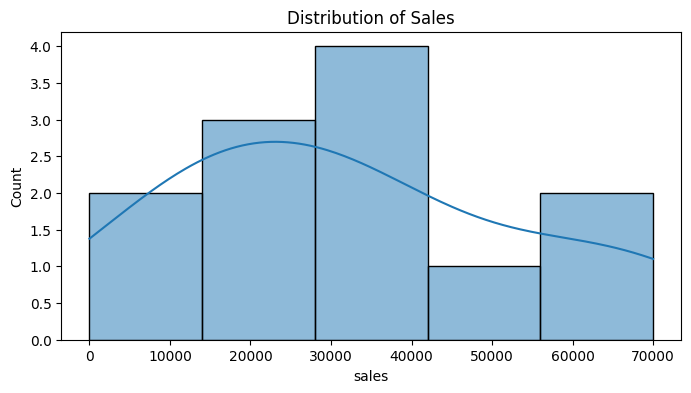

In [79]:
plt.figure(figsize=(8, 4))
# bins: 막대 개수 (데이터를 나누는 구간의 수)
sns.histplot(data=df, x='sales', bins=5, kde=True) 
plt.title("Distribution of Sales")
plt.show()

1) X축 (데이터 값 구간, bins)
* 연속형 데이터를 여러 구간으로 나눈 것
* 예: sales를 5개의 구간으로 나누면, 각 구간마다 막대 생성

2) Y축 (빈도 / count)
* 각 구간에 속하는 데이터 개수
* kde=True 옵션을 쓰면 커널 밀도 추정 곡선이 같이 표시 → 데이터 분포 형태를 부드럽게 확인 가능

3) 막대(Bar)
* 각 구간에 속한 데이터 개수를 시각적으로 표현
* 높을수록 그 구간에 데이터가 많음

1) 데이터 집중 구간 확인
* 막대가 높은 구간 → 데이터가 몰려 있는 영역

2) 분포 형태 확인
* 좌우 대칭 → 정규분포 느낌
* 한쪽으로 치우침 → 왜도(skew) 확인 가능

3) 밀도 곡선(kde) 활용
* 데이터가 연속적으로 어떤 패턴을 가지는지 부드럽게 관찰 가능

## 3. '방어적 항해' 팁
* 데이터 복사: 원본 훼손 방지를 위해 항상 df_clean = df.copy() 후 작업을 권장함.
* 중간 점검: 전처리 단계마다 df.info() 또는 df.head()를 호출하여 타입 변환 여부를 상시 확인함.
* 이상치 경계: 시각화 결과가 상식 밖일 경우, 전처리 단계의 결측치 처리 방식(예: 0으로 채우기)이 적절했는지 재검토함.

In [ ]:
#!python -m jupyter nbconvert --to markdown 전처리시각화.ipynb

[NbConvertApp] Converting notebook 전처리시각화.ipynb to markdown
[NbConvertApp] Support files will be in 전처리시각화_files\
[NbConvertApp] Making directory 전처리시각화_files
[NbConvertApp] Writing 6378 bytes to 전처리시각화.md


In [81]:
print("sonamu")

sonamu


In [ ]:
# 1. 블로그 내용
# 2. 강의 동영상(gpt)
# 3. 04 이론/실습 (아마 간단함)
# 4. 계속 반복 복습